In [1]:
!nvidia-smi

Sun Mar 28 13:09:08 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [16]:
!unzip /content/drive/MyDrive/Colab\ Notebooks/Projects/TensorFlow/Todo/CNN/Food-classification-11-category/data.zip

Archive:  /content/drive/MyDrive/Colab Notebooks/Projects/TensorFlow/Todo/CNN/Food-classification-11-category/data.zip
replace dataset/dataset/test/0000.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [2]:
models_to_try = [
    ['efficentnetb2','https://tfhub.dev/tensorflow/efficientnet/b2/feature-vector/1'],
    ['efficentnetb7','https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1'],
    ['efficentnetb5','https://tfhub.dev/tensorflow/efficientnet/b5/feature-vector/1'],
    ['efficentnetb0','https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1'],
    ['efficentnetb4','https://tfhub.dev/tensorflow/efficientnet/b4/feature-vector/1'],
    ['efficentnetb3','https://tfhub.dev/tensorflow/efficientnet/b3/feature-vector/1'],
    ['efficentnetb1','https://tfhub.dev/tensorflow/efficientnet/b1/feature-vector/1'],
    ['efficentnetb6','https://tfhub.dev/tensorflow/efficientnet/b6/feature-vector/1'],
    ['resnet50','https://tfhub.dev/tensorflow/resnet_50/feature_vector/1'],
    ['resnet_v2_152','https://tfhub.dev/google/imagenet/resnet_v2_152/feature_vector/4'],
    ['resnet_v1_152','https://tfhub.dev/google/imagenet/resnet_v1_152/feature_vector/4'],
    ['resnet_v1_50','https://tfhub.dev/google/imagenet/resnet_v1_50/feature_vector/4'],
    ['resnet_v1_101','https://tfhub.dev/google/imagenet/resnet_v1_101/feature_vector/4'],
    ['amiebanet_a_n18_f448','https://tfhub.dev/google/imagenet/amoebanet_a_n18_f448/feature_vector/1'],
    ['inception_resnet_v2','https://tfhub.dev/google/imagenet/inception_resnet_v2/feature_vector/4'],
    ['inception_v1','https://tfhub.dev/google/imagenet/inception_v1/feature_vector/4'],
    ['inception_v3','https://tfhub.dev/google/imagenet/inception_v3/feature_vector/4'],
    ['nasnet_large','https://tfhub.dev/google/imagenet/nasnet_large/feature_vector/4'],
    ['nasnet_mobile','https://tfhub.dev/google/imagenet/nasnet_mobile/feature_vector/4'],
    ['mobilenet_v2','https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'],
    ['mobilenet_v3_large_100_224','https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/feature_vector/5'],
    ['mobilenet_v2_100_224','https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4'],
    ['mobilenet_v2_140_224','https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4'],
    ['mobilenet_v1_100_224','https://tfhub.dev/google/imagenet/mobilenet_v1_100_224/feature_vector/4'],
    ['mobilenet_v3_small_100_224','https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/feature_vector/5'],
    ['pnasnet_large','https://tfhub.dev/google/imagenet/pnasnet_large/feature_vector/4'],
    ['cond-biggan','https://tfhub.dev/vtab/cond-biggan/1'],
    ['uncond-biggan','https://tfhub.dev/vtab/uncond-biggan/1']
]

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [5]:
import os
import random

In [6]:
os.listdir(f'/content/dataset/dataset/train')

['Rice',
 'Noodles-Pasta',
 'Dessert',
 'Vegetable-Fruit',
 'Dairy product',
 'Soup',
 'Seafood',
 'Fried food',
 'Meat',
 'Egg',
 'Bread']

How many imgs ? - 1
train
Noodles-Pasta
199.jpg


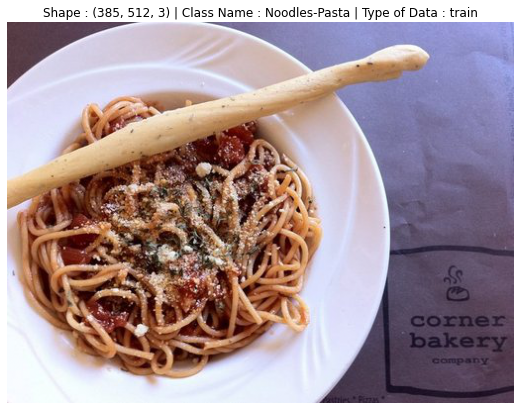

In [7]:
how_many_imgs = int(input('How many imgs ? - '))
for _ in range(how_many_imgs):
  type_of_data = random.choice(['train'])
  print(type_of_data)
  type_of_class = random.choice(os.listdir(f'/content/dataset/dataset/{type_of_data}'))
  print(type_of_class)
  file_name = random.choice(os.listdir(f'/content/dataset/dataset/{type_of_data}/{type_of_class}/'))
  print(file_name)
  img = mpimg.imread(f'/content/dataset/dataset/{type_of_data}/{type_of_class}/{file_name}')
  img = img / 255.0
  plt.figure(figsize=(10,7))
  plt.imshow(img)
  plt.axis(False)
  plt.title(f'Shape : {img.shape} | Class Name : {type_of_class} | Type of Data : {type_of_data}')
  plt.show();

In [8]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
datagen = ImageDataGenerator(rescale=1/255.0,rotation_range=0.25,width_shift_range=0.25,height_shift_range=0.25,shear_range=0.25,zoom_range=0.25,horizontal_flip=True,vertical_flip=True,validation_split=0.50)
train_data = datagen.flow_from_directory('dataset/dataset/train',target_size=(224,224),subset='training')
test_data = datagen.flow_from_directory('dataset/dataset/train',target_size=(224,224),subset='validation')

Found 2467 images belonging to 11 classes.
Found 2464 images belonging to 11 classes.


## Modelling

In [11]:
!pip3 install wandb
import wandb
from wandb.keras import *

In [ ]:
for model_to_try in models_to_try:
  try:
    print('-'*100)
    print(model_to_try)
    print('-'*100)
    wandb.init(project="Food-Classification-11",name=f"{model_to_try[0]}-0")
    model = tf.keras.Sequential([
      hub.KerasLayer(model_to_try[1],input_shape=(224,224,3)),
      tf.keras.layers.Dense(len(os.listdir(f'/content/dataset/dataset/train')),activation='softmax')
    ])
    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
    model.fit(train_data,validation_data=(test_data),epochs=5,callbacks=[WandbCallback()])
  except:
    print('*-*'*100)
    print(model_to_try)
    print('*-*'*100)
    print('It didnt work')

# Results

## `val_loss` best = mobilenet_v3_large_100_224
## `val_accuracy` best = mobilenet_v3_large_100_224
## `accuracy` best = mobilenet_v3_large_100_224
## `loss` best = mobilenet_v3_large_100_224

In [23]:
datagen = ImageDataGenerator(rescale=1/255.0,rotation_range=0.25,width_shift_range=0.25,height_shift_range=0.25,shear_range=0.25,zoom_range=0.25,horizontal_flip=True,vertical_flip=True,validation_split=0.25)
train_data = datagen.flow_from_directory('dataset/dataset/train',target_size=(224,224),subset='training')
test_data = datagen.flow_from_directory('dataset/dataset/train',target_size=(224,224),subset='validation')

Found 3702 images belonging to 11 classes.
Found 1229 images belonging to 11 classes.


In [24]:
model_url = "https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/feature_vector/5"
wandb.init(project="Food-Classification-11",name=f"big-dog-model-1")
model = tf.keras.Sequential([
  hub.KerasLayer(model_url,input_shape=(224,224,3)),
  tf.keras.layers.Dense(len(os.listdir(f'/content/dataset/dataset/train')),activation='softmax')
])
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
model.fit(train_data,validation_data=(test_data),epochs=100,callbacks=[WandbCallback(),tf.keras.callbacks.EarlyStopping(patience=5)])

wandb: ERROR Control-C detected -- Run data was not synced


Epoch 1/100
116/116 [==============================] - 74s 607ms/step - loss: 1.6855 - accuracy: 0.4411 - val_loss: 0.7948 - val_accuracy: 0.7478
Epoch 2/100
116/116 [==============================] - 69s 596ms/step - loss: 0.6847 - accuracy: 0.7713 - val_loss: 0.6831 - val_accuracy: 0.7762
Epoch 3/100
116/116 [==============================] - 69s 599ms/step - loss: 0.5445 - accuracy: 0.8296 - val_loss: 0.6118 - val_accuracy: 0.8039
Epoch 4/100
116/116 [==============================] - 69s 595ms/step - loss: 0.4559 - accuracy: 0.8506 - val_loss: 0.5901 - val_accuracy: 0.8047
Epoch 5/100
116/116 [==============================] - 69s 592ms/step - loss: 0.4158 - accuracy: 0.8656 - val_loss: 0.6044 - val_accuracy: 0.7925
Epoch 6/100
116/116 [==============================] - 69s 594ms/step - loss: 0.3780 - accuracy: 0.8754 - val_loss: 0.5550 - val_accuracy: 0.8112
Epoch 7/100
116/116 [==============================] - 69s 596ms/step - loss: 0.3576 - accuracy: 0.8894 - val_loss: 0.5599 -

In [34]:
model.save(path + '/model.h5')

In [35]:
path = "/content/drive/MyDrive/Colab Notebooks/Projects/TensorFlow/Todo/CNN/Food-classification-11-category"

In [36]:
class_names = os.listdir('/content/dataset/dataset/train/')

In [37]:
class_names

['Rice',
 'Noodles-Pasta',
 'Dessert',
 'Vegetable-Fruit',
 'Dairy product',
 'Soup',
 'Seafood',
 'Fried food',
 'Meat',
 'Egg',
 'Bread']

In [38]:
test_imgs = os.listdir('/content/test')

In [39]:
test_imgs

['download (16).jpeg',
 'download (1).jpeg',
 'download (7).jpeg',
 'download (14).jpeg',
 'download (20).jpeg',
 'download.jpeg',
 'download (23).jpeg',
 'download (36).jpeg',
 'download (5).jpeg',
 'download (15).jpeg',
 'download (21).jpeg',
 'download (13).jpeg',
 'download (33).jpeg',
 '.ipynb_checkpoints',
 'download (37).jpeg',
 'download (18).jpeg',
 'download (10).jpeg',
 'download (2).jpeg',
 'download (17).jpeg',
 'download (11).jpeg',
 'download (32).jpeg',
 'download (25).jpeg',
 'download (24).jpeg',
 'download (34).jpeg',
 'download (26).jpeg',
 'download (12).jpeg',
 'download (29).jpeg',
 'download (8).jpeg',
 'download (3).jpeg',
 'download (27).jpeg',
 'download (31).jpeg',
 'download (35).jpeg',
 'download (22).jpeg',
 'download (9).jpeg',
 'download (6).jpeg',
 'download (28).jpeg',
 'download (30).jpeg',
 'download (4).jpeg',
 'download (19).jpeg']

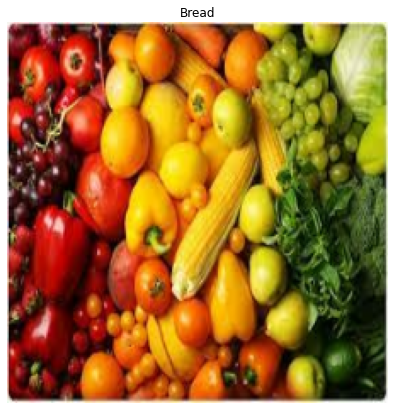

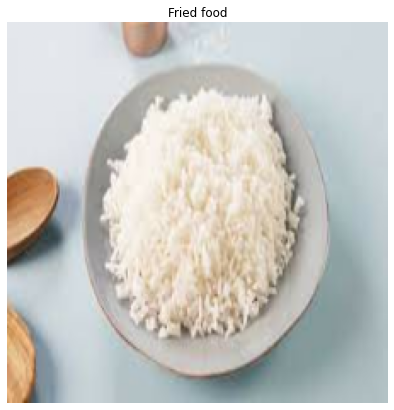

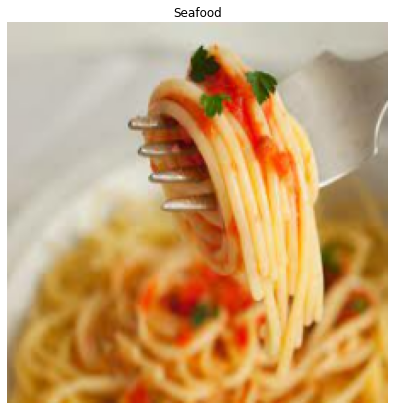

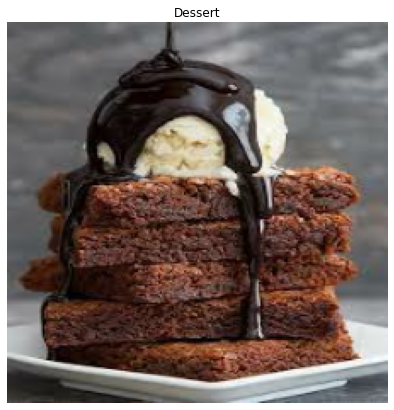

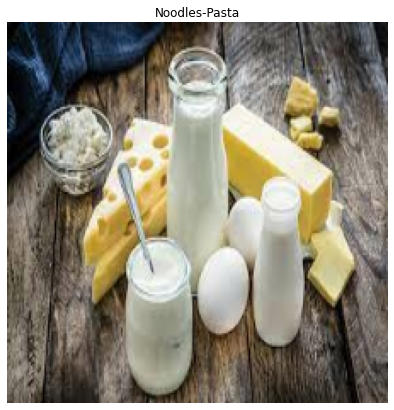

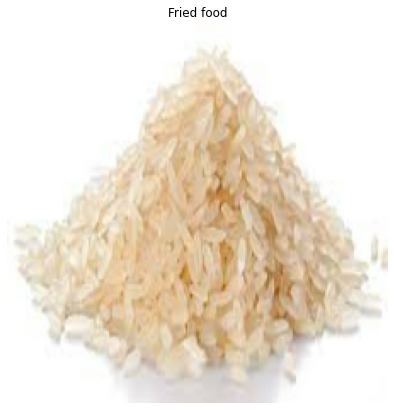

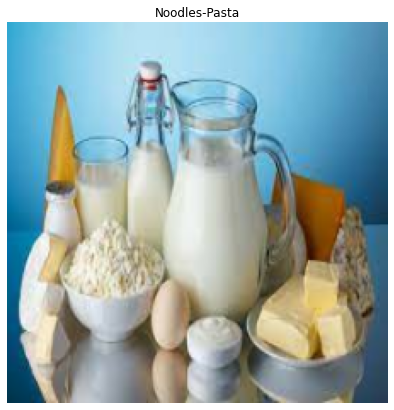

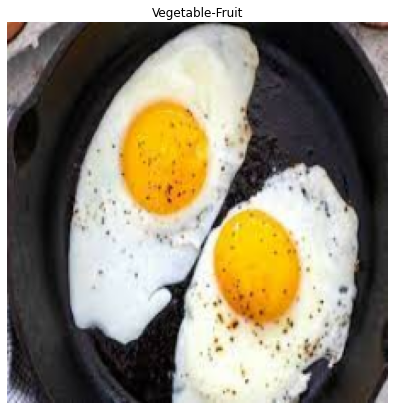

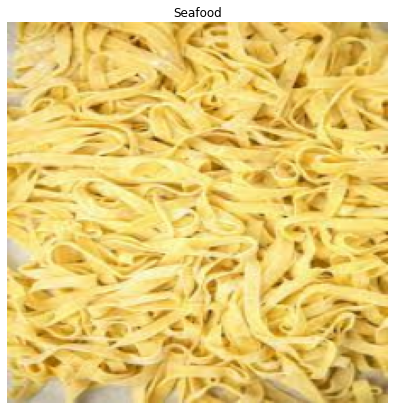

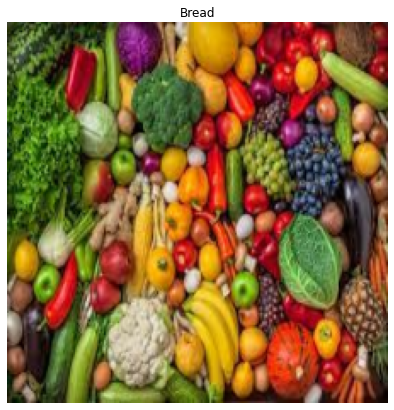

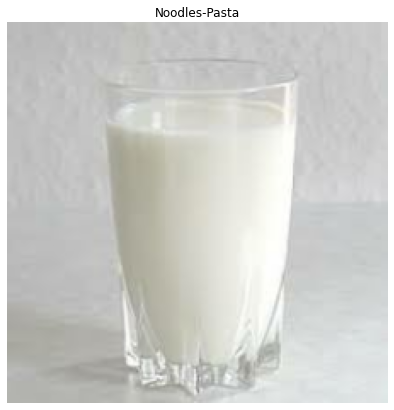

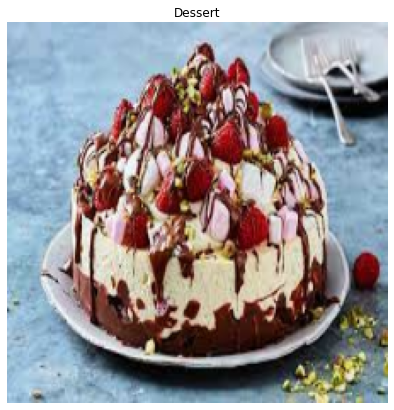

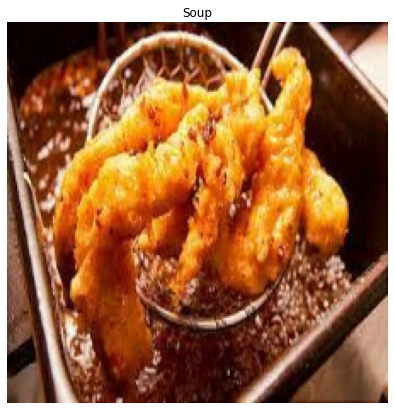

FailedPreconditionError: ignored

In [40]:
for test_img in test_imgs:
  img = tf.io.read_file(f'/content/test/{test_img}')
  img = tf.io.decode_jpeg(img)
  img = tf.image.resize(images=img,size=(224,224))
  img = img / 255.0
  preds = model.predict(tf.expand_dims(img,axis=0))
  plt.figure(figsize=(10,7))
  plt.imshow(img)
  plt.title(f'{class_names[preds.argmax()]}')
  plt.axis(False)
  plt.show();